<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Read-financial-data" data-toc-modified-id="Read-financial-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read financial data</a></span></li><li><span><a href="#Read-temperature-data" data-toc-modified-id="Read-temperature-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read temperature data</a></span><ul class="toc-item"><li><span><a href="#Montly-temp-differ-data" data-toc-modified-id="Montly-temp-differ-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Montly temp differ data</a></span></li><li><span><a href="#Yearly-temp-differ-data" data-toc-modified-id="Yearly-temp-differ-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Yearly temp differ data</a></span></li><li><span><a href="#Bushfire-data" data-toc-modified-id="Bushfire-data-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Bushfire data</a></span></li></ul></li></ul></li><li><span><a href="#US-Average-Temp-difference-Correlation-Analysis" data-toc-modified-id="US-Average-Temp-difference-Correlation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Average Temp difference Correlation Analysis</a></span><ul class="toc-item"><li><span><a href="#Monthly" data-toc-modified-id="Monthly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monthly</a></span></li><li><span><a href="#Yearly" data-toc-modified-id="Yearly-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Yearly</a></span></li></ul></li><li><span><a href="#Temp-difference-on-States" data-toc-modified-id="Temp-difference-on-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temp difference on States</a></span></li><li><span><a href="#Bushfires" data-toc-modified-id="Bushfires-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bushfires</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Person" data-toc-modified-id="Person-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Person</a></span></li><li><span><a href="#Spearman" data-toc-modified-id="Spearman-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Spearman</a></span></li><li><span><a href="#Kendall" data-toc-modified-id="Kendall-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Kendall</a></span></li></ul></li></ul></div>

# Set up

In [79]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import json
import re
from geopy.geocoders import Nominatim

# Read data

## Read financial data

In [164]:
def toInt(l:list) -> list:
    for i in range(len(l)):
        l[i] = float(l[i])

root_path = os.path.abspath(os.path.dirname(os.getcwd()))
data_path = os.path.join(root_path, 'data')
agr_path = os.path.join(data_path, 'agriculture')

finc_data = []
for file in os.listdir(agr_path):
    if file.endswith('.json'):
        file_path = os.path.join(agr_path, file)
        with open(file_path, 'r') as file:
            finc_data.append(json.load(file))
        
ROA_data = {}
state_data = {}
for i in finc_data:
    for k, v in i.items():
        try:
            state_data[k] =  i[k]['state']
            ROA_data[k] = pd.DataFrame.from_dict(i[k]['ROA'])
        except:
            pass

In [81]:
# transform dict to pd
pd.DataFrame.from_dict(finc_data[0]['RKDA']['stock prices']) 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-05-15,154.000000,141.199997,149.800003,146.000000,79130.0,146.000000
1,2015-05-18,160.800003,142.000000,145.000000,149.000000,12200.0,149.000000
2,2015-05-19,156.800003,146.000000,154.000000,156.000000,5005.0,156.000000
3,2015-05-20,158.000000,151.199997,152.800003,155.800003,5810.0,155.800003
4,2015-05-21,158.000000,151.800003,153.800003,157.800003,5175.0,157.800003
...,...,...,...,...,...,...,...
1414,2020-12-24,2.640000,2.530000,2.610000,2.580000,207200.0,2.580000
1415,2020-12-28,2.665000,2.510000,2.650000,2.540000,410800.0,2.540000
1416,2020-12-29,2.570000,2.421000,2.540000,2.470000,377000.0,2.470000
1417,2020-12-30,2.540000,2.475000,2.500000,2.490000,269500.0,2.490000


## Read temperature data

### Montly temp differ data

In [82]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'monthly_temp_difference(1980-2013).csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_montly_data = pd.read_csv(file_path)

rename the time_difference

In [83]:
time_diff = []
for i in temp_diff_montly_data["Time_Difference"]:
    i = i.split('-')
    month = re.compile(r'(?<= )\d+(?=])')
    month = re.search(month, i[-1])[0] # get the month
    i = month + '/31/' + i[0]
    time_diff.append(i)
temp_diff_montly_data["Time_Difference"] = time_diff

### Yearly temp differ data

In [84]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'Yearly_temp_difference.csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_yearly_data = pd.read_csv(file_path)

### Bushfire data

In [85]:
climate_path = os.path.join(data_path, 'climate')

file_name = 'Wildfire_data.csv'
file_path = os.path.join(climate_path, file_name)
bushfire_data = pd.read_csv(file_path)

# US Average Temp difference Correlation Analysis

1. `SEED` = ROA varies a little
2. cluster between ROA and temperature

In [86]:
def corr_ana(l1:list, l2:list, x, y):
    assert len(roa_data) == len(temp_data)
    if len(l1) > 5:
        # Pearson correlation
        pearson = pearsonr(l1, l2)[0]
        p_p_value = pearsonr(l1, l2)[1]
        # Spearman correlation
        spearman = spearmanr(l1, l2)[0]
        s_p_value = spearmanr(l1, l2)[1]
        # Kendall correlation
        tau, k_p_value = kendalltau(l1, l2)
        # print the results
        print("""Correlation analysis between {comp} and montly temp difference:
        Perason coefficient is {pearson:.3f} with {p_p_value:.3f} p-value.
        Spearman coefficient is {spearman:.3f} with {s_p_value:.3f} p-value.
        Kendall coefficient is {kendall:.3f} with {k_p_value:.3f} p-value.
        """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
                    spearman = spearman, s_p_value = s_p_value, 
                     kendall = tau, k_p_value = k_p_value))
        plt.scatter(l1, l2)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    else:
        print("\nData Insufficient.\n")

## Monthly


Data Insufficient.

Correlation analysis between YTEN and montly temp difference:
        Perason coefficient is 0.082 with 0.823 p-value.
        Spearman coefficient is 0.042 with 0.907 p-value.
        Kendall coefficient is 0.022 with 1.000 p-value.
        


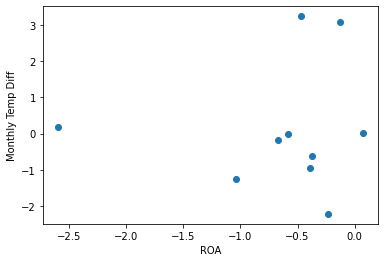

Correlation analysis between AVD and montly temp difference:
        Perason coefficient is -0.251 with 0.207 p-value.
        Spearman coefficient is -0.263 with 0.185 p-value.
        Kendall coefficient is -0.181 with 0.200 p-value.
        


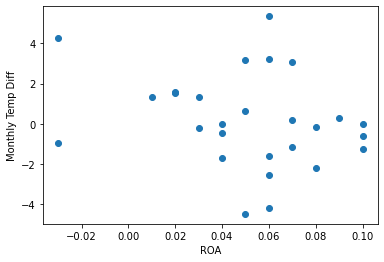

Correlation analysis between ICL and montly temp difference:
        Perason coefficient is -0.076 with 0.857 p-value.
        Spearman coefficient is 0.238 with 0.570 p-value.
        Kendall coefficient is 0.143 with 0.720 p-value.
        


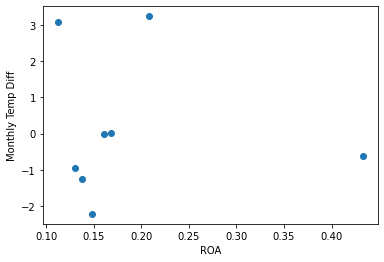


Data Insufficient.

Correlation analysis between IPI and montly temp difference:
        Perason coefficient is 0.296 with 0.519 p-value.
        Spearman coefficient is 0.071 with 0.879 p-value.
        Kendall coefficient is 0.048 with 1.000 p-value.
        


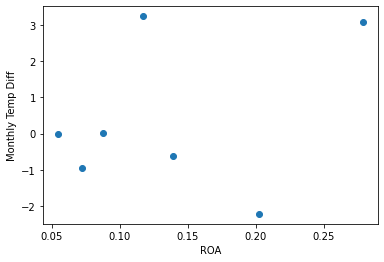

Correlation analysis between NTR and montly temp difference:
        Perason coefficient is 0.009 with 0.967 p-value.
        Spearman coefficient is -0.012 with 0.953 p-value.
        Kendall coefficient is 0.000 with 1.000 p-value.
        


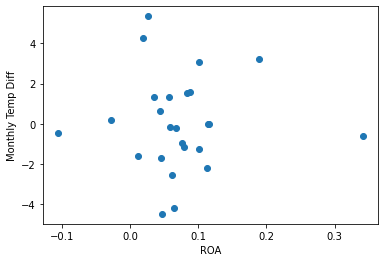


Data Insufficient.


Data Insufficient.


Data Insufficient.

Correlation analysis between FMC and montly temp difference:
        Perason coefficient is -0.227 with 0.255 p-value.
        Spearman coefficient is 0.100 with 0.619 p-value.
        Kendall coefficient is 0.077 with 0.591 p-value.
        


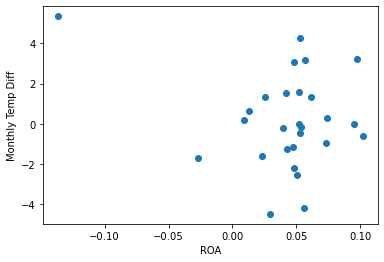


Data Insufficient.


Data Insufficient.


Data Insufficient.

Correlation analysis between CF and montly temp difference:
        Perason coefficient is 0.003 with 0.994 p-value.
        Spearman coefficient is 0.018 with 0.958 p-value.
        Kendall coefficient is -0.018 with 1.000 p-value.
        


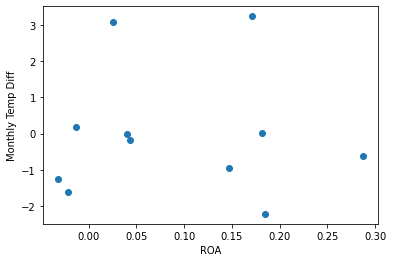


Data Insufficient.


Data Insufficient.

Correlation analysis between MOS and montly temp difference:
        Perason coefficient is 0.392 with 0.384 p-value.
        Spearman coefficient is 0.536 with 0.215 p-value.
        Kendall coefficient is 0.333 with 0.381 p-value.
        


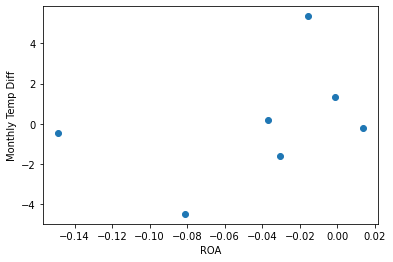

In [87]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
#         print(i)
        try: 
            t = temp_diff_montly_data.loc[temp_diff_montly_data['Time_Difference'] == i]['Temperature_Difference']
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i].values[0]
                roa = float(roa)
                if roa and not np.isnan(roa): # to aviod nan value
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
        # try correlation analysis
    corr_ana(roa_data, temp_data, 'ROA', 'Monthly Temp Diff')
        

## Yearly


Data Insufficient.

Correlation analysis between YTEN and montly temp difference:
        Perason coefficient is 0.336 with 0.313 p-value.
        Spearman coefficient is 0.191 with 0.574 p-value.
        Kendall coefficient is 0.055 with 0.879 p-value.
        


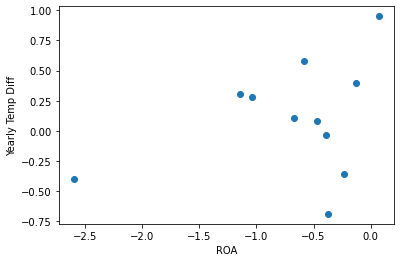

Correlation analysis between AVD and montly temp difference:
        Perason coefficient is -0.166 with 0.400 p-value.
        Spearman coefficient is -0.059 with 0.766 p-value.
        Kendall coefficient is -0.022 with 0.874 p-value.
        


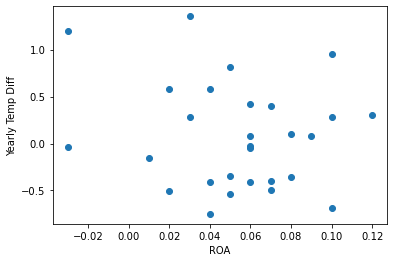

Correlation analysis between ICL and montly temp difference:
        Perason coefficient is -0.610 with 0.081 p-value.
        Spearman coefficient is -0.233 with 0.546 p-value.
        Kendall coefficient is -0.167 with 0.612 p-value.
        


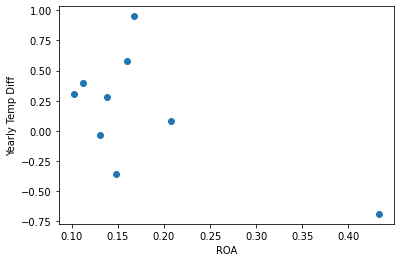


Data Insufficient.

Correlation analysis between IPI and montly temp difference:
        Perason coefficient is -0.252 with 0.546 p-value.
        Spearman coefficient is -0.333 with 0.420 p-value.
        Kendall coefficient is -0.214 with 0.548 p-value.
        


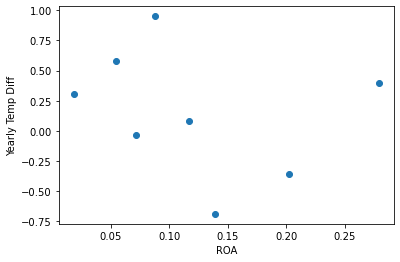

Correlation analysis between NTR and montly temp difference:
        Perason coefficient is -0.034 with 0.869 p-value.
        Spearman coefficient is 0.158 with 0.440 p-value.
        Kendall coefficient is 0.114 with 0.431 p-value.
        


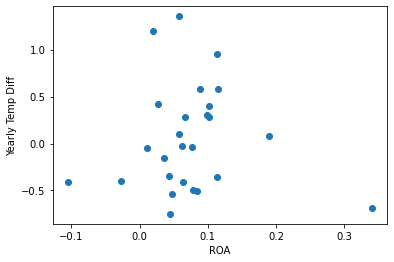

Correlation analysis between CGA and montly temp difference:
        Perason coefficient is 0.373 with 0.410 p-value.
        Spearman coefficient is -0.036 with 0.939 p-value.
        Kendall coefficient is -0.048 with 1.000 p-value.
        


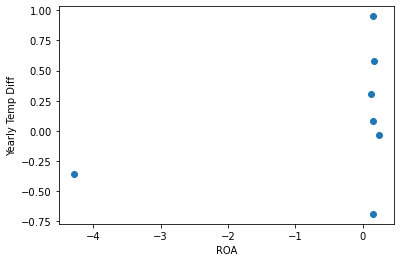

Correlation analysis between MGPI and montly temp difference:
        Perason coefficient is -0.008 with 0.968 p-value.
        Spearman coefficient is -0.149 with 0.466 p-value.
        Kendall coefficient is -0.108 with 0.457 p-value.
        


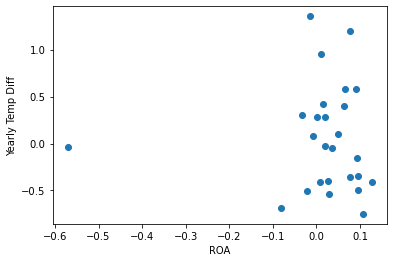

Correlation analysis between SMG and montly temp difference:
        Perason coefficient is 0.043 with 0.840 p-value.
        Spearman coefficient is 0.182 with 0.395 p-value.
        Kendall coefficient is 0.159 with 0.290 p-value.
        


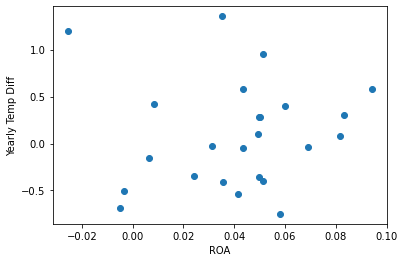

Correlation analysis between FMC and montly temp difference:
        Perason coefficient is 0.037 with 0.851 p-value.
        Spearman coefficient is 0.147 with 0.455 p-value.
        Kendall coefficient is 0.132 with 0.336 p-value.
        


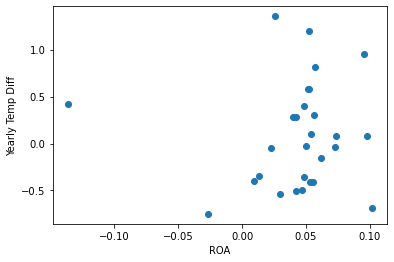


Data Insufficient.


Data Insufficient.

Correlation analysis between UAN and montly temp difference:
        Perason coefficient is -0.673 with 0.143 p-value.
        Spearman coefficient is -0.543 with 0.266 p-value.
        Kendall coefficient is -0.467 with 0.272 p-value.
        


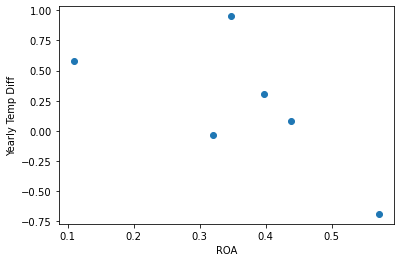

Correlation analysis between CF and montly temp difference:
        Perason coefficient is -0.232 with 0.467 p-value.
        Spearman coefficient is -0.182 with 0.572 p-value.
        Kendall coefficient is -0.152 with 0.545 p-value.
        


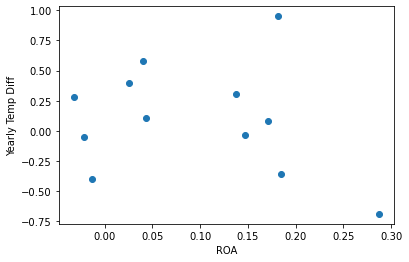


Data Insufficient.

Correlation analysis between SEED and montly temp difference:
        Perason coefficient is -0.102 with 0.752 p-value.
        Spearman coefficient is 0.469 with 0.124 p-value.
        Kendall coefficient is 0.394 with 0.086 p-value.
        


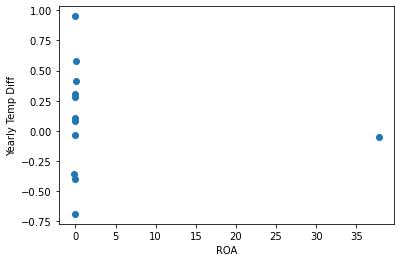

Correlation analysis between MOS and montly temp difference:
        Perason coefficient is 0.126 with 0.539 p-value.
        Spearman coefficient is 0.166 with 0.418 p-value.
        Kendall coefficient is 0.105 with 0.453 p-value.
        


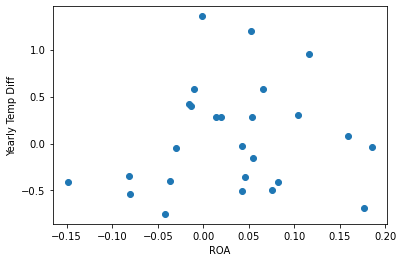

In [88]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        year = i.split('/')[-1]
        try: 
            t = temp_diff_yearly_data.loc[temp_diff_yearly_data['Year'] == int(year)]['Difference']
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

# Temp difference on States

In [90]:
# get us companies
us_comps = []

for comp in finc_data:
    name = list(comp.keys())[0]
    if comp[name]['location'][-1] == 'United States':
        us_comps.append(comp)

# read raw temp data
climate_path = os.path.join(climate_path, 'US_temperature_data')
file_name = 'original_temp_data.csv'
file_path = os.path.join(climate_path, file_name)
raw_temp_date = pd.read_csv(file_path)

In [ ]:
us_comps[0]['RKDA']['state']

Want I want = the pairs of (ROA, temp differ)

The logic:

1. get the state of the company
2. get the state temperature 
3. according to the company's ROA date, get the timeline which helps us to find the corresponding temperature data
4. temperature difference = current year avg. temp - the past *n* years avg. temp

In [ ]:
def cal_temp_diff(i: int, comp):
    """
    :i = the past n year(s)
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        i = i.split('/')
        roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    for roa in range(len(roa_time)-1):
        now = roa_time[roa]
        past_year = roa_time[roa-1]
        temp_sum = 0
        temp_count = 0
        for temp in range(len(state_temp_time)):
            if past_year <= state_temp_time[temp] < now:
                temp_sum += 
                temp_count += 1
            temp_avg = temp_summp/temp_count

In [130]:
t1 = raw_temp_date.loc[raw_temp_date['State'] == 'California']
t1 = t1.set_index("Date")
t1.loc['1980/1/1']

AverageTemperature                       7.716
AverageTemperatureUncertainty            0.275
State                               California
Country                          United States
Name: 1980/1/1, dtype: object

In [174]:
state_temp_time = []
for i in t1.index.values:
    i = i.split('/')
    state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))

In [91]:
raw_temp_date

,Date,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1980/1/1,8.452,0.171,Alabama,United States
1,1980/2/1,6.275,0.145,Alabama,United States
2,1980/3/1,11.830,0.116,Alabama,United States
3,1980/4/1,16.182,0.263,Alabama,United States
4,1980/5/1,21.644,0.189,Alabama,United States
...,...,...,...,...,...
20650,2013/5/1,10.607,0.208,Wyoming,United States
20651,2013/6/1,16.267,0.276,Wyoming,United States
20652,2013/7/1,20.222,0.133,Wyoming,United States
20653,2013/8/1,19.621,0.217,Wyoming,United States


# Bushfires

Correlation analysis between RKDA and montly temp difference:
        Perason coefficient is -0.319 with 0.402 p-value.
        Spearman coefficient is -0.200 with 0.606 p-value.
        Kendall coefficient is -0.167 with 0.612 p-value.
        


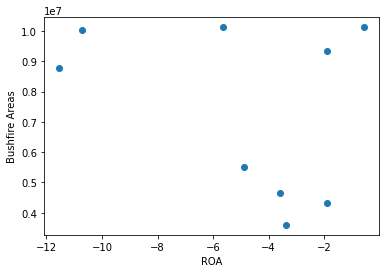

Correlation analysis between YTEN and montly temp difference:
        Perason coefficient is 0.383 with 0.116 p-value.
        Spearman coefficient is 0.313 with 0.206 p-value.
        Kendall coefficient is 0.216 with 0.229 p-value.
        


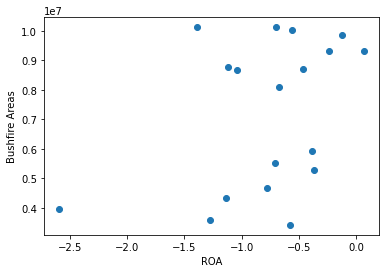

Correlation analysis between AVD and montly temp difference:
        Perason coefficient is 0.150 with 0.389 p-value.
        Spearman coefficient is 0.112 with 0.520 p-value.
        Kendall coefficient is 0.072 with 0.558 p-value.
        


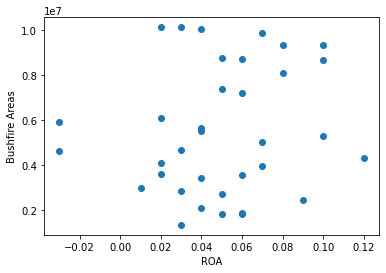

Correlation analysis between ICL and montly temp difference:
        Perason coefficient is -0.126 with 0.641 p-value.
        Spearman coefficient is -0.153 with 0.572 p-value.
        Kendall coefficient is -0.117 with 0.564 p-value.
        


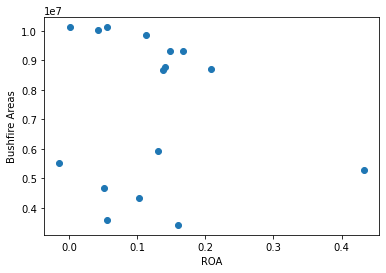


Data Insufficient.

Correlation analysis between IPI and montly temp difference:
        Perason coefficient is -0.175 with 0.532 p-value.
        Spearman coefficient is -0.114 with 0.685 p-value.
        Kendall coefficient is -0.029 with 0.923 p-value.
        


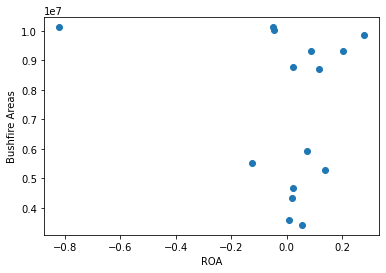

Correlation analysis between NTR and montly temp difference:
        Perason coefficient is 0.121 with 0.503 p-value.
        Spearman coefficient is 0.152 with 0.398 p-value.
        Kendall coefficient is 0.091 with 0.469 p-value.
        


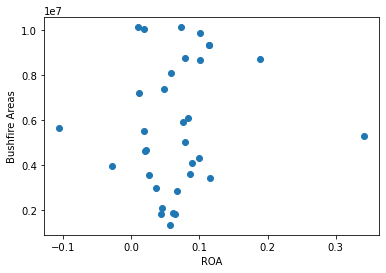

Correlation analysis between CGA and montly temp difference:
        Perason coefficient is -0.296 with 0.304 p-value.
        Spearman coefficient is -0.437 with 0.118 p-value.
        Kendall coefficient is -0.319 with 0.127 p-value.
        


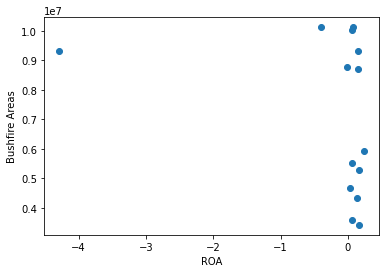

Correlation analysis between MGPI and montly temp difference:
        Perason coefficient is 0.046 with 0.801 p-value.
        Spearman coefficient is 0.106 with 0.559 p-value.
        Kendall coefficient is 0.076 with 0.549 p-value.
        


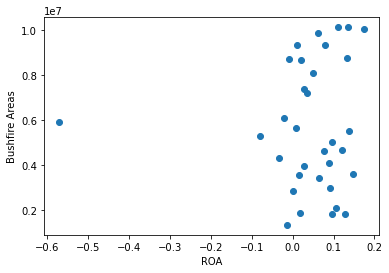

Correlation analysis between SMG and montly temp difference:
        Perason coefficient is 0.210 with 0.256 p-value.
        Spearman coefficient is 0.276 with 0.133 p-value.
        Kendall coefficient is 0.209 with 0.103 p-value.
        


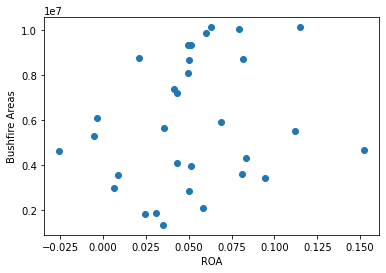

Correlation analysis between FMC and montly temp difference:
        Perason coefficient is 0.305 with 0.075 p-value.
        Spearman coefficient is 0.266 with 0.123 p-value.
        Kendall coefficient is 0.170 with 0.151 p-value.
        


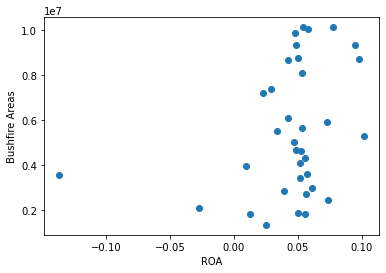

Correlation analysis between MBII and montly temp difference:
        Perason coefficient is -0.222 with 0.538 p-value.
        Spearman coefficient is -0.018 with 0.960 p-value.
        Kendall coefficient is -0.022 with 1.000 p-value.
        


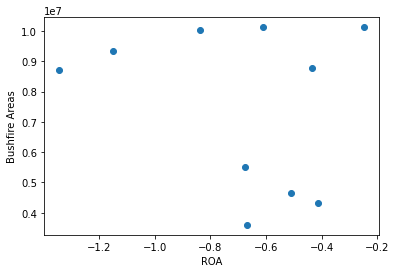


Data Insufficient.

Correlation analysis between UAN and montly temp difference:
        Perason coefficient is -0.321 with 0.284 p-value.
        Spearman coefficient is -0.330 with 0.271 p-value.
        Kendall coefficient is -0.231 with 0.306 p-value.
        


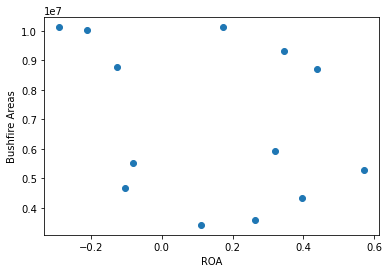

Correlation analysis between CF and montly temp difference:
        Perason coefficient is -0.080 with 0.746 p-value.
        Spearman coefficient is -0.004 with 0.989 p-value.
        Kendall coefficient is 0.041 with 0.836 p-value.
        


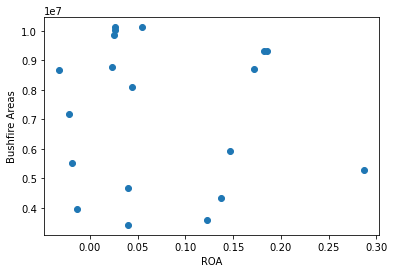


Data Insufficient.

Correlation analysis between SEED and montly temp difference:
        Perason coefficient is 0.023 with 0.924 p-value.
        Spearman coefficient is -0.500 with 0.029 p-value.
        Kendall coefficient is -0.357 with 0.034 p-value.
        


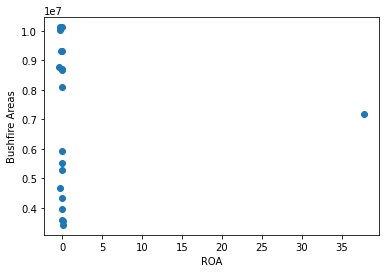

Correlation analysis between MOS and montly temp difference:
        Perason coefficient is 0.118 with 0.512 p-value.
        Spearman coefficient is 0.099 with 0.583 p-value.
        Kendall coefficient is 0.082 with 0.505 p-value.
        


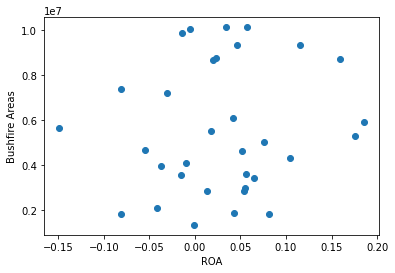

In [63]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        year = i.split('/')[-1]
        
        try: 
            t = bushfire_data.loc[bushfire_data['Year'] == int(year)]['Acres']
            t = int(t.values[0].replace(',', ''))
            if t:
                roa = ROA_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    corr_ana(roa_data, temp_data, 'ROA', 'Bushfire Areas')

# Appendix

## Person

$$
r=\frac{\sum\left(x-m_{x}\right)\left(y-m_{y}\right)}{\sqrt{\sum\left(x-m_{x}\right)^{2} \sum\left(y-m_{y}\right)^{2}}}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

## Spearman

$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$

$\rho$ 	=	Spearman's rank correlation coefficient  
$d_i$ = difference between the two ranks of each observation  
$n$ = number of observations

REF1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html  
REF2: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

In [118]:
spearmanr(a, b)

SpearmanrResult(correlation=0.04242424242424241, pvalue=0.907363817812816)

## Kendall

$$
\tau=\frac{(\text { number of concordant pairs })-(\text { number of discordant pairs })}{\left(\begin{array}{c}
n \\
2
\end{array}\right)}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html?highlight=kendall#scipy.stats.kendalltau

In [120]:
x1 = [12, 2, 1, 12, 2]
x2 = [1, 4, 7, 1, 0]
tau, p_value = kendalltau(a, b)
print(tau, p_value)

0.022222222222222223 1.0
